### Mega Millions Jackpot Project
#### by Erika Harrell
#### A project exploring data downloaded from data.gov on the winning numbers from the Mega Millions Jackpot in the New York State Lottery drawn between May 2002 and May 2025.

In [1]:
#apply Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import plotly.express as px
from IPython.core.interactiveshell import InteractiveShell
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import seaborn as sns

In [2]:
#make cells show all output 
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#read in data
df = pd.read_csv('nylottery.csv')

In [4]:
#1st 5 rows of data
df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,09/25/2020,20 36 37 48 67,16,2.0
1,09/29/2020,14 39 43 44 67,19,3.0
2,10/02/2020,09 38 47 49 68,25,2.0
3,10/06/2020,15 16 18 39 59,17,3.0
4,10/09/2020,05 11 25 27 64,13,2.0


In [5]:
#last 5 rows of data frame
df.tail()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
2397,05/16/2025,02 22 42 62 66,14,NaN
2398,05/20/2025,18 30 33 55 64,11,NaN
2399,05/23/2025,07 18 40 55 68,18,NaN
2400,05/27/2025,06 28 34 48 62,9,NaN
2401,05/30/2025,02 28 37 38 58,13,NaN


In [6]:
#information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2402 entries, 0 to 2401
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        2402 non-null   object 
 1   Winning Numbers  2402 non-null   object 
 2   Mega Ball        2402 non-null   int64  
 3   Multiplier       1483 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 75.2+ KB


In [7]:
#turn draw Date column into Date column with datetime format
df['Date']=pd.to_datetime(df['Draw Date'])

In [8]:
#creating separate variables for each winning number
df[['win_num_1', 'win_num_2', 'win_num_3','win_num_4', 'win_num_5']] = df['Winning Numbers'].str.split(expand=True)

In [9]:
#get the day of the week, month and year from the Date variable
df['Day of the week']=df['Date'].dt.day_name()
df['Month']=df['Date'].dt.month_name()
df['Year']=df['Date'].dt.year

In [10]:
#make the winning number columns numeric
df['win_num_1']=pd.to_numeric(df['win_num_1'])
df['win_num_2']=pd.to_numeric(df['win_num_2'])
df['win_num_3']=pd.to_numeric(df['win_num_3'])
df['win_num_4']=pd.to_numeric(df['win_num_4'])
df['win_num_5']=pd.to_numeric(df['win_num_5'])

In [11]:
#check 1st five rows of dataframe
df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier,Date,win_num_1,win_num_2,win_num_3,win_num_4,win_num_5,Day of the week,Month,Year
0,09/25/2020,20 36 37 48 67,16,2.0,2020-09-25,20,36,37,48,67,Friday,September,2020
1,09/29/2020,14 39 43 44 67,19,3.0,2020-09-29,14,39,43,44,67,Tuesday,September,2020
2,10/02/2020,09 38 47 49 68,25,2.0,2020-10-02,9,38,47,49,68,Friday,October,2020
3,10/06/2020,15 16 18 39 59,17,3.0,2020-10-06,15,16,18,39,59,Tuesday,October,2020
4,10/09/2020,05 11 25 27 64,13,2.0,2020-10-09,5,11,25,27,64,Friday,October,2020


In [12]:
#check last 5 rows of dataframe
df.tail()

,Draw Date,Winning Numbers,Mega Ball,Multiplier,Date,win_num_1,win_num_2,win_num_3,win_num_4,win_num_5,Day of the week,Month,Year
2397,05/16/2025,02 22 42 62 66,14,NaN,2025-05-16,2,22,42,62,66,Friday,May,2025
2398,05/20/2025,18 30 33 55 64,11,NaN,2025-05-20,18,30,33,55,64,Tuesday,May,2025
2399,05/23/2025,07 18 40 55 68,18,NaN,2025-05-23,7,18,40,55,68,Friday,May,2025
2400,05/27/2025,06 28 34 48 62,9,NaN,2025-05-27,6,28,34,48,62,Tuesday,May,2025
2401,05/30/2025,02 28 37 38 58,13,NaN,2025-05-30,2,28,37,38,58,Friday,May,2025


In [13]:
#put dataframe in order by date
df=df.sort_values(by='Date', ignore_index=True)
#look at 1st 5 rows
df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier,Date,win_num_1,win_num_2,win_num_3,win_num_4,win_num_5,Day of the week,Month,Year
0,05/17/2002,15 18 25 33 47,30,NaN,2002-05-17,15,18,25,33,47,Friday,May,2002
1,05/21/2002,04 28 39 41 44,9,NaN,2002-05-21,4,28,39,41,44,Tuesday,May,2002
2,05/24/2002,02 04 32 44 52,36,NaN,2002-05-24,2,4,32,44,52,Friday,May,2002
3,05/28/2002,06 21 22 29 32,24,NaN,2002-05-28,6,21,22,29,32,Tuesday,May,2002
4,05/31/2002,12 28 45 46 52,47,NaN,2002-05-31,12,28,45,46,52,Friday,May,2002


In [14]:
#look at last 5 rows
df.tail()

,Draw Date,Winning Numbers,Mega Ball,Multiplier,Date,win_num_1,win_num_2,win_num_3,win_num_4,win_num_5,Day of the week,Month,Year
2397,05/16/2025,02 22 42 62 66,14,NaN,2025-05-16,2,22,42,62,66,Friday,May,2025
2398,05/20/2025,18 30 33 55 64,11,NaN,2025-05-20,18,30,33,55,64,Tuesday,May,2025
2399,05/23/2025,07 18 40 55 68,18,NaN,2025-05-23,7,18,40,55,68,Friday,May,2025
2400,05/27/2025,06 28 34 48 62,9,NaN,2025-05-27,6,28,34,48,62,Tuesday,May,2025
2401,05/30/2025,02 28 37 38 58,13,NaN,2025-05-30,2,28,37,38,58,Friday,May,2025


In [15]:
#look at information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2402 entries, 0 to 2401
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Draw Date        2402 non-null   object        
 1   Winning Numbers  2402 non-null   object        
 2   Mega Ball        2402 non-null   int64         
 3   Multiplier       1483 non-null   float64       
 4   Date             2402 non-null   datetime64[ns]
 5   win_num_1        2402 non-null   int64         
 6   win_num_2        2402 non-null   int64         
 7   win_num_3        2402 non-null   int64         
 8   win_num_4        2402 non-null   int64         
 9   win_num_5        2402 non-null   int64         
 10  Day of the week  2402 non-null   object        
 11  Month            2402 non-null   object        
 12  Year             2402 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(4)
memory usage: 234.7+ KB


In [16]:
#check for missing values
df.isnull().sum()

Draw Date            0
Winning Numbers      0
Mega Ball            0
Multiplier         919
Date                 0
win_num_1            0
win_num_2            0
win_num_3            0
win_num_4            0
win_num_5            0
Day of the week      0
Month                0
Year                 0
dtype: int64

In [17]:
#get the years covered in the dataset
df['Year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025], dtype=int32)

In [18]:
#create the bar chart for the number of observations per year
#get unique x-axis values
unique_values = sorted(df["Year"].unique())
#create histogram of number of observations by year
fig = px.histogram(df, x="Year", nbins=50, 
                   title="Number of Mega Millions Drawings by Year",
                   color_discrete_sequence=['gold']).update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=unique_values
    )
)
fig.show()

In [19]:
#get number of rows by day of the week
df['Day of the week'].value_counts()

Day of the week
Friday     1201
Tuesday    1201
Name: count, dtype: int64

In [20]:
#get mode of each winning number
print('The most frequent 1st winning number is', statistics.mode(df['win_num_1']), '.')
print('The most frequent 2nd winning number is', statistics.mode(df['win_num_2']), '.')
print('The most frequent 3rd winning number is', statistics.mode(df['win_num_3']), '.')
print('The most frequent 4th winning number is', statistics.mode(df['win_num_4']), '.')
print('The most frequent 5th winning number is', statistics.mode(df['win_num_5']), '.')

The most frequent 1st winning number is 2 .
The most frequent 2nd winning number is 17 .
The most frequent 3rd winning number is 31 .
The most frequent 4th winning number is 46 .
The most frequent 5th winning number is 52 .


In [21]:
#get the median for each winning number
print('The median of the 1st winning numbers is', round(statistics.median(df['win_num_1'])), '.')
print('The median of the 2nd winning numbers is', round(statistics.median(df['win_num_2'])), '.')
print('The median of the 3rd winning numbers is', round(statistics.median(df['win_num_3'])), '.')
print('The median of the 4th winning numbers is', round(statistics.median(df['win_num_4'])), '.')
print('The median of the 5th winning numbers is', round(statistics.median(df['win_num_5'])), '.')

The median of the 1st winning numbers is 8 .
The median of the 2nd winning numbers is 20 .
The median of the 3rd winning numbers is 31 .
The median of the 4th winning numbers is 42 .
The median of the 5th winning numbers is 53 .


In [22]:
#get the mean of each winning number
print('The mean of the 1st winning numbers is', round(np.mean(df['win_num_1'])), '.')
print('The mean of the 2nd winning numbers is', round(np.mean(df['win_num_2'])), '.')
print('The mean of the 3rd winning numbers is', round(np.mean(df['win_num_3'])), '.')
print('The mean of the 4th winning numbers is', round(np.mean(df['win_num_4'])), '.')
print('The mean of the 5th winning numbers is', round(np.mean(df['win_num_5'])), '.')

The mean of the 1st winning numbers is 10 .
The mean of the 2nd winning numbers is 21 .
The mean of the 3rd winning numbers is 32 .
The mean of the 4th winning numbers is 42 .
The mean of the 5th winning numbers is 53 .


In [23]:
#get the lowest and highest integer for each winning number
print("The lowest first winning number is", round(min(df['win_num_1'])), "and the highest first winning number is", round(max(df['win_num_1'])), ".")
print("The lowest second winning number is", round(min(df['win_num_2'])), "and the highest second winning number is", round(max(df['win_num_2'])), ".")
print("The lowest third winning number is", round(min(df['win_num_3'])), "and the highest third winning number is", round(max(df['win_num_3'])), ".")
print("The lowest fourth winning number is", round(min(df['win_num_4'])), "and the highest fourth winning number is", round(max(df['win_num_4'])), ".")
print("The lowest fifth winning number is", round(min(df['win_num_5'])), "and the highest fifth winning number is", round(max(df['win_num_5'])), ".")

The lowest first winning number is 1 and the highest first winning number is 56 .
The lowest second winning number is 2 and the highest second winning number is 66 .
The lowest third winning number is 3 and the highest third winning number is 68 .
The lowest fourth winning number is 5 and the highest fourth winning number is 74 .
The lowest fifth winning number is 14 and the highest fifth winning number is 75 .


In [24]:
#boxplots for each winning number showing distribution
#make variables for each winning number
first=df['win_num_1']
second=df['win_num_2']
third=df['win_num_3']
fourth=df['win_num_4']
fifth=df['win_num_5']
fig = go.Figure()
fig.add_trace(go.Box(y=first, name='1st Winning Number', marker_color='mediumvioletred')).add_trace(go.Box(y=second, name='2nd Winning Number', marker_color='darkred')).add_trace(go.Box(y=third, name='3rd Winning Number', marker_color='teal')).add_trace(go.Box(y=fourth, name='4th Winning Number', marker_color='dodgerblue')).add_trace(go.Box(y=fifth, name='5th Winning Number', marker_color='blueviolet')).update_layout(title_text="Box Plots of the Distributions of the Winning Numbers")

In [25]:
#histogram of 1st winning number
fig = px.histogram(df, x="win_num_1", nbins=100,title="Histogram of the Distribution of the 1st Winning Number",labels={
                     "win_num_1": " 1st Winning Number"},color_discrete_sequence=['darkkhaki'])
fig.show()

In [26]:
#histogram of 2nd winning number
fig = px.histogram(df, x="win_num_2", nbins=100,title="Histogram of the Distribution of the 2nd Winning Number",labels={
                     "win_num_2": " 2nd Winning Number"},color_discrete_sequence=['darksalmon'])
fig.show()

In [27]:
#histogram of 3rd winning number
fig = px.histogram(df, x="win_num_3", nbins=100,title="Histogram of the Distribution of the 3rd Winning Number",labels={
                     "win_num_3": " 3rd Winning Number"},color_discrete_sequence=['navy'])
fig.show()

In [28]:
#histogram of 4th winning number
fig = px.histogram(df, x="win_num_4", nbins=100,title="Histogram of the Distribution of the 4th Winning Number",labels={
                     "win_num_4": " 4th Winning Number"},color_discrete_sequence=['mediumturquoise'])
fig.show()

In [29]:
#histogram of 5th winning number
fig = px.histogram(df, x="win_num_5", nbins=100,title="Histogram of the Distribution of the 5th Winning Number",labels={
                     "win_num_5": " 5th Winning Number"},color_discrete_sequence=['steelblue'])
fig.show()

In [30]:
#create 3d plot with first 3 winning numbers
x=df['win_num_1']
y=df['win_num_2']
z=df['win_num_3']
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers+text',
    hoverinfo='text', 
    hovertext=df['Winning Numbers'],
    marker=dict(
        size=5,
        color=y,
        colorscale='Viridis', 
        opacity=0.8
    )
)]).update_layout(title=dict(text="3D Scatter Plot of the 1st 3 Winning Numbers"),
                    margin=dict(l=0, r=0, t=30, b=0),
                    scene = dict(
                    xaxis = dict(title='1st Winning Number'),
                    yaxis = dict(title='2nd Winning Number'),
                    zaxis = dict(title='3rd Winning Number')
                    ))
fig.show()

In [31]:
#create 3d plot with last 3 winning numbers
x=df['win_num_3']
y=df['win_num_4']
z=df['win_num_5']
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers+text',
    hoverinfo='text', 
    hovertext=df['Winning Numbers'],
    marker=dict(
        size=5,
        color=y,
        colorscale='electric', 
        opacity=0.8
    )
)]).update_layout(title=dict(text="3D Scatter Plot of the Last 3 Winning Numbers"),
                    margin=dict(l=0, r=0, t=30, b=0),
                    scene = dict(
                    xaxis = dict(title='3rd Winning Number'),
                    yaxis = dict(title='4th Winning Number'),
                    zaxis = dict(title='5th Winning Number')
                    ))
fig.show()

In [32]:
#create 3d plot with odd winning numbers
x=df['win_num_1']
y=df['win_num_3']
z=df['win_num_5']
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers+text',
    hoverinfo='text', 
    hovertext=df['Winning Numbers'],
    marker=dict(
        size=5,
        color=y,
        colorscale='sunset', 
        opacity=0.8
    )
)]).update_layout(title=dict(text="3D Scatter Plot of the Odd Winning Numbers"),
                    margin=dict(l=0, r=0, t=30, b=0),
                    scene = dict(
                    xaxis = dict(title='1st Winning Number'),
                    yaxis = dict(title='3rd Winning Number'),
                    zaxis = dict(title='5th Winning Number')
                    ))
fig.show()

In [33]:
#scatter plot of the even winning numbers
x=df['win_num_2']
y=df['win_num_4']
fig = go.Figure(data=[go.Scatter(
    x=x,
    y=y,
    mode='markers+text',
    hoverinfo='text', 
    hovertext=df['Winning Numbers'],
    marker=dict(
        size=5,
        color=y,
        colorscale='sunset', 
        opacity=0.8
    )
)]).update_layout(title=dict(text="Scatter Plot of the Even Winning Numbers"),                    
                   xaxis_title="2nd winning Number" ,
                   yaxis_title="4th Winning Number"                  
                    )
fig.show()

In [34]:
#histogram of Mega Ball
fig = px.histogram(df, x="Mega Ball", nbins=100,title="Histogram of the Distribution of the Mega Ball",color_discrete_sequence=['sienna'])
fig.show()

In [35]:
#get the mean, median, mode, minimum and maximum of the Mega Ball
print("The mean of the Mega Ball is", round(np.mean(df['Mega Ball'])), ".")
print("The median of the Mega Ball is", round(statistics.median(df['Mega Ball'])), ".")
print("The most frequent Mega Ball is", round(statistics.mode(df['Mega Ball'])), ".")
print("The lowest Mega Ball is", round(min(df['Mega Ball'])), ".")
print("The highest Mega Ball is", round(max(df['Mega Ball'])), ".")

The mean of the Mega Ball is 18 .
The median of the Mega Ball is 15 .
The most frequent Mega Ball is 9 .
The lowest Mega Ball is 1 .
The highest Mega Ball is 52 .


In [36]:
#boxplot for the MEga Ball
fig = go.Figure()
fig.add_trace(go.Box(y=df['Mega Ball'], name='Mega Ball', marker_color='purple'))

In [37]:
#all the values of the Multiplier variable
df['Multiplier'].unique()

array([nan,  4.,  2.,  3.,  5.])

In [38]:
#ceate a series with multiplier column
#look at frequencies of values in Multiplier column
df['Multiplier'].value_counts()
#make list of frequencies
mylist=list(df['Multiplier'].value_counts())
#get number of missing values
sum((df['Multiplier']).isna())
#append missing numbers onto list
mylist.append(sum((df['Multiplier']).isna()))
#look at list
print(mylist)

Multiplier
3.0    500
4.0    409
2.0    376
5.0    198
Name: count, dtype: int64

919

[500, 409, 376, 198, 919]


In [39]:
#rearrange list so that the value for 2 (376) is first
#remove element from list
element=mylist.pop(2)
#add element to mylist
mylist.insert(0,element)
#look at list
#print(mylist)
#create list for index
myindex=['2','3','4','5', 'Missing']
#create sereis
myseries=pd.Series(mylist,index=myindex)
#look atseries
myseries

2          376
3          500
4          409
5          198
Missing    919
dtype: int64

In [40]:
#create barchart of Multiplier 
fig = px.bar(myseries, 
             title="Number of Observtions for Each Multiplier",
             labels={'value':'Number of Observations', 
                     'index':'Multiplier'}, 
             color_discrete_sequence=['lightseagreen']).update_layout(showlegend=False)
fig.show()

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Winning Numbers and Mega Ball')

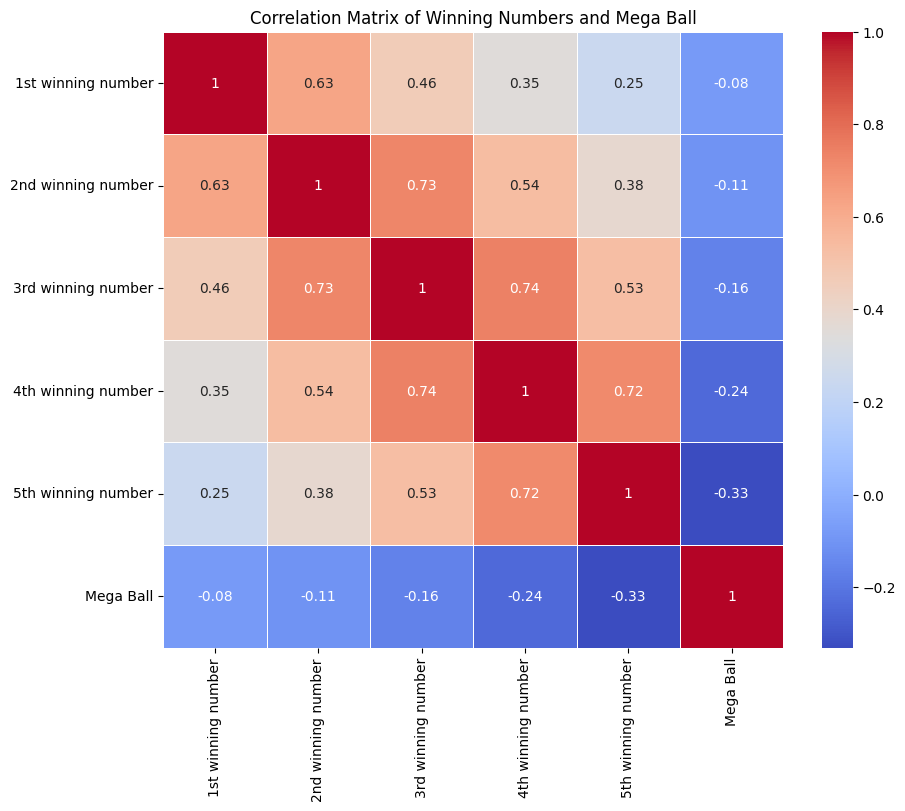

In [51]:
#create correlation matrix heatmap with winning numbers and Mega Ball
#create data frame with columns with winning numbers and Mega Ball
df_short=df[['win_num_1','win_num_2','win_num_3','win_num_4','win_num_5',"Mega Ball"]]
df_short=df_short.rename(columns={'win_num_1':'1st winning number',
                 'win_num_2':'2nd winning number',
                 'win_num_3':'3rd winning number',
                 'win_num_4':'4th winning number',
                 'win_num_5':'5th winning number',
                 'Mega Ball':'Mega Ball'})
#calculate correlation matrix
correlation_matrix=df_short.corr(numeric_only=True)
#creat heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Winning Numbers and Mega Ball')
plt.show()